In [21]:
import torch # use torch.tensor instead of np.array
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Oppgavetekst
Lag en lineær modell som predikerer vekt ut fra lengde gitt observasjonene i
length_weight.csv

### Notes

* Use torch.tensor instead of np.array
* Matrix multiplication is done with @
* The reshape() function is used a lot, and lets us convert a table into a specified matrix shape. It can act as transpose


In [91]:
data = pd.read_csv("length_weight.csv")

x_train = torch.tensor(data["# length"]).reshape(-1, 1)
y_train = torch.tensor(data["weight"]).reshape(-1, 1)

print(x_train)

tensor([[ 80.7000],
        [ 80.4000],
        [ 72.5000],
        [103.0000],
        [107.6000],
        [ 79.4000],
        [ 81.9000],
        [101.6000],
        [108.6000],
        [ 95.7000],
        [ 52.7000],
        [106.4000],
        [ 78.9000],
        [ 95.3000],
        [ 74.6000],
        [ 85.1000],
        [ 84.8000],
        [ 89.3000],
        [ 68.4000],
        [ 48.9000],
        [ 88.3000],
        [ 53.4000],
        [ 65.5000],
        [ 73.5000],
        [109.2000],
        [ 55.5000],
        [ 87.5000],
        [ 60.9000],
        [ 55.3000],
        [ 54.0000],
        [ 57.8000],
        [ 51.3000],
        [ 99.5000],
        [ 84.3000],
        [ 93.1000],
        [ 52.7000],
        [ 65.7000],
        [ 90.0000],
        [ 81.8000],
        [ 51.1000],
        [ 82.4000],
        [ 88.4000],
        [ 53.6000],
        [ 56.9000],
        [ 83.1000],
        [107.5000],
        [ 61.2000],
        [ 82.2000],
        [ 59.5000],
        [100.0000],


In [94]:
class LinearRegressionModel:

    def __init__(self):
        #Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def f(self, x):
        return x @ self.W + self.b

    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))

In [95]:
model = LinearRegressionModel()

#Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], 0.01)
for epoch in range(1000):
    model.loss(x_train, y_train).backward() #Compute loss gradients
    optimizer.step() #Optimizes by adjusting W and b
    #similiar to model.W -= model.W.grad * 0.01 (and same for b)

    optimizer.zero_grad() #Clear gradients for next step

RuntimeError: expected scalar type Double but found Float

In [ ]:
# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[nan]], dtype=torch.float64, requires_grad=True), b = tensor([[nan]], dtype=torch.float64, requires_grad=True), loss = tensor(nan, dtype=torch.float64, grad_fn=<MeanBackward0>)


RuntimeError: expected scalar type Double but found Float

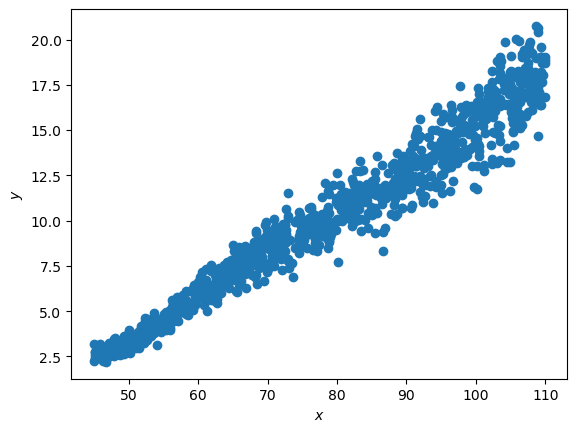

In [88]:
# Visualisering

plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')

plt.xlabel("$x$")
plt.ylabel("$y$")

x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])

plt.plot(x, model.f(x).detach(), label='$f(x) = xW+b$')

plt.legend()
plt.show()